In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff

In [2]:
df = pd.read_csv('stroke_data.csv')

## About the data

- id: unique identifier 
- gender: "Male", "Female" or "Other"
- age: age of the patient
- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- ever_married: "No" or "Yes"
- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- Residence_type: "Rural" or "Urban"
- avg_glucose_level: average glucose level in blood
- bmi: body mass index
- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient



In [3]:
df.shape

(5110, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
id                   5110 non-null int64
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  4909 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


- id columns is irrelavent
- the average age is 43
- average glucose level is 106
- minimun age is questionable

### checking for null values

In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Creating a heatmap

<AxesSubplot:>

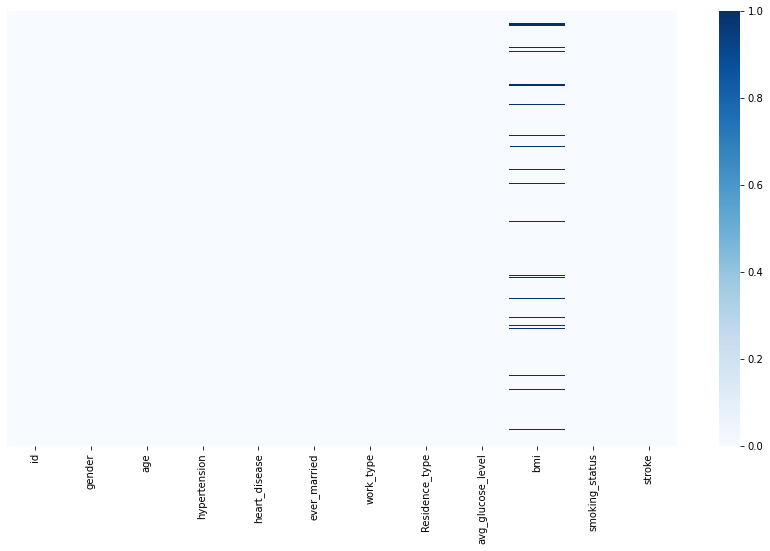

In [7]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(), cmap='Blues', yticklabels = False)

### id column in not required

In [8]:
df.drop('id', axis = 1, inplace = True)

### filling NaN values in bmi by its mean

In [9]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

<AxesSubplot:>

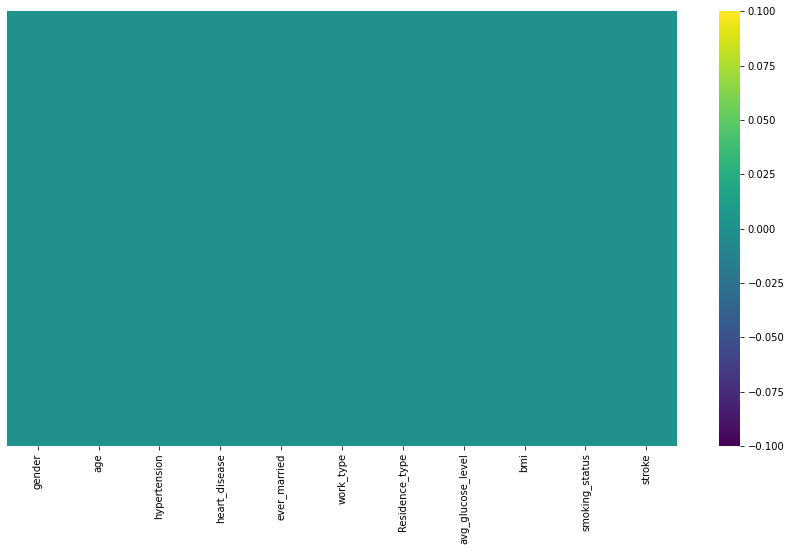

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(), cmap='viridis', yticklabels = False)

### one more to check for missing values is using the missingno library

<AxesSubplot:>

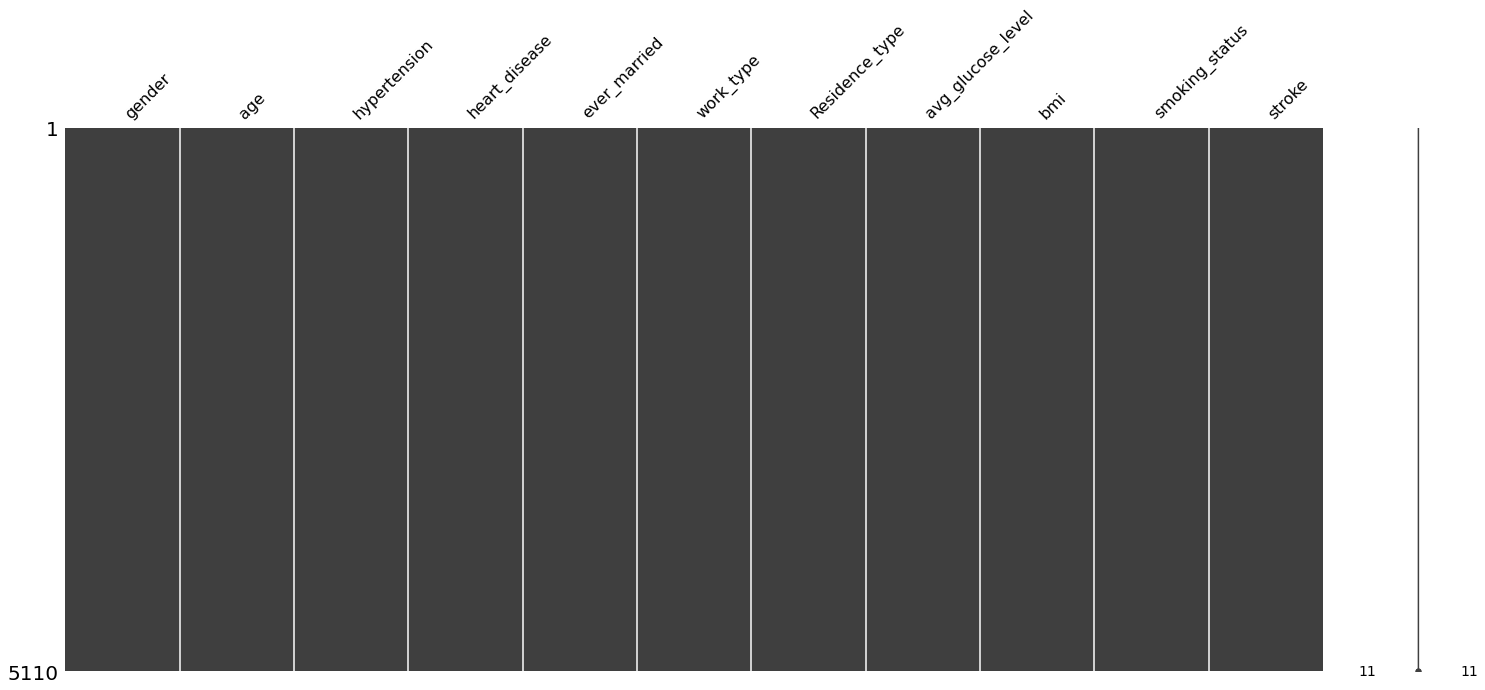

In [11]:
import missingno as msno

msno.matrix(df)

###  The bar chart gives you an idea about how many missing values are there in each column

<AxesSubplot:>

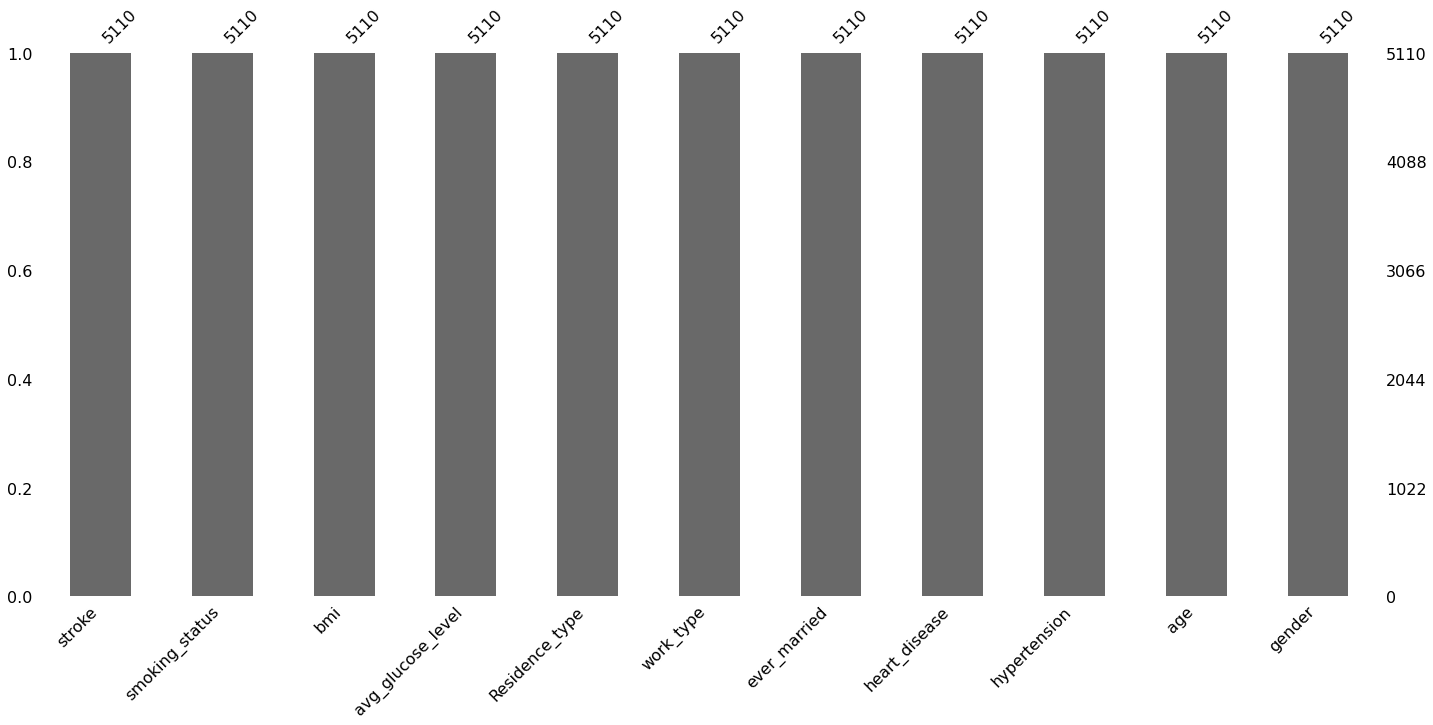

In [12]:
msno.bar(df, sort = 'descending')

### understanding the data distrubition using pairplot

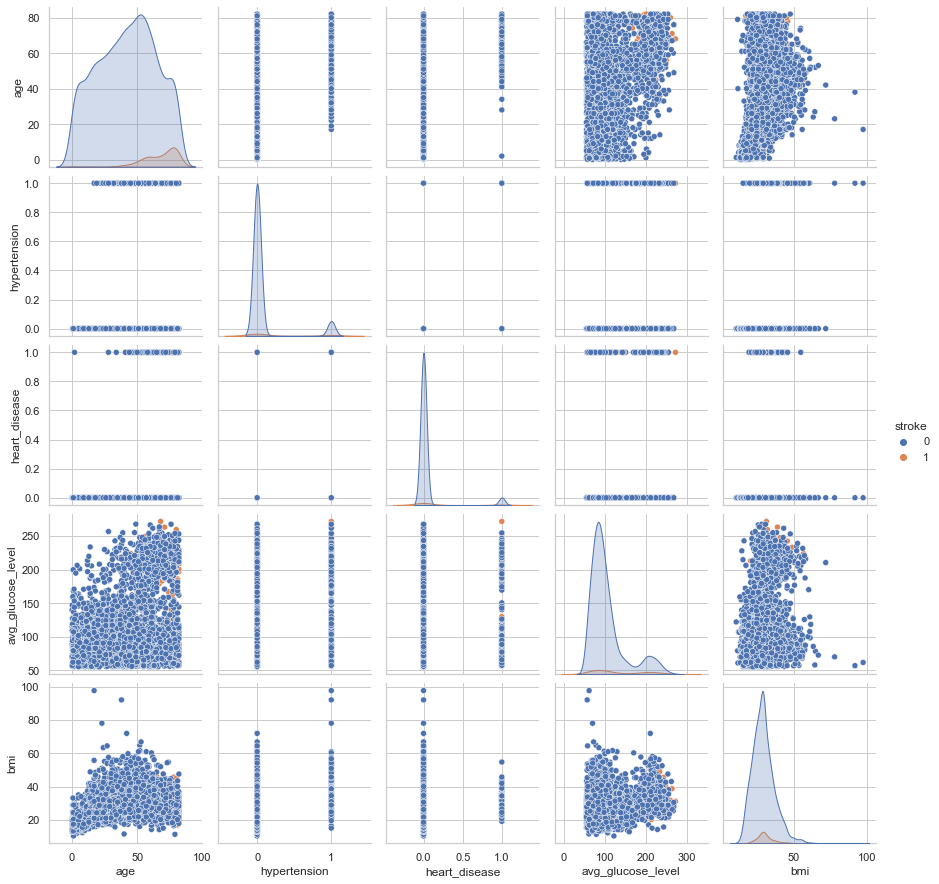

In [31]:
import seaborn as sns
sns.pairplot(data=df, hue= 'stroke' )

### Categorical plotting

<AxesSubplot:xlabel='stroke', ylabel='count'>

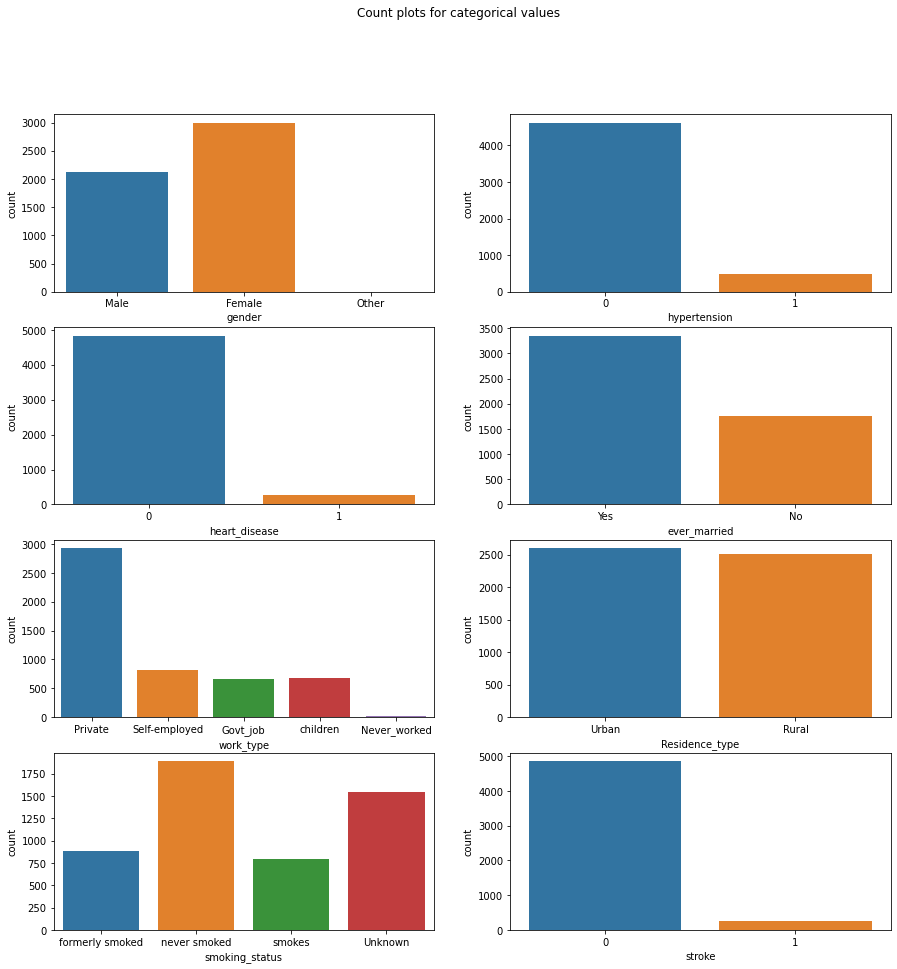

In [14]:
fig, ax = plt.subplots(4,2, figsize = (15,15))
plt.suptitle("Count plots for categorical values")
sns.countplot(ax=ax[0,0], x='gender',data=df)
sns.countplot(ax=ax[0,1], x='hypertension',data=df)
sns.countplot(ax=ax[1,0], x='heart_disease',data=df)
sns.countplot(ax=ax[1,1], x='ever_married',data=df)
sns.countplot(ax=ax[2,0],data=df,x='work_type')
sns.countplot(ax=ax[2,1],data=df,x='Residence_type')
sns.countplot(ax=ax[3,0],data=df,x='smoking_status')
sns.countplot(ax=ax[3,1],data=df,x='stroke')


### Categorical plotting

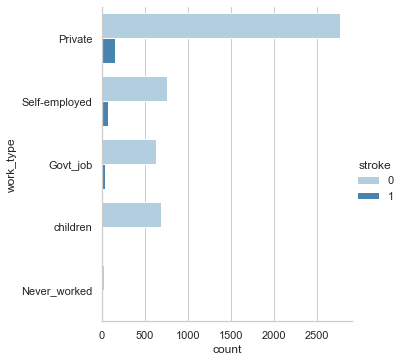

In [27]:
sns.catplot(y="work_type", hue="stroke", kind="count",
            palette="Blues",data=df)

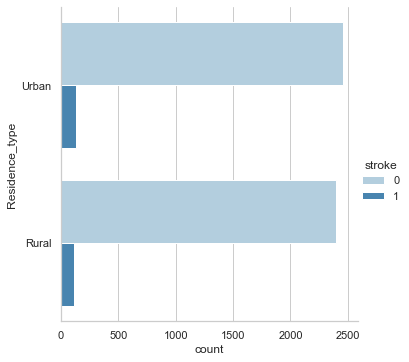

In [28]:
sns.catplot(y="Residence_type", hue="stroke", kind="count",
            palette="Blues",data=df)

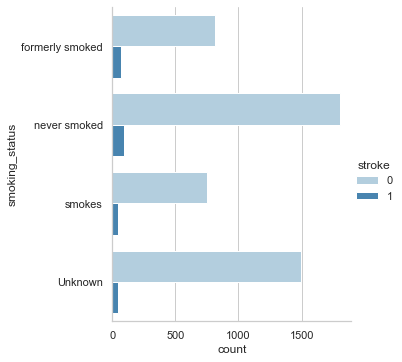

In [29]:
sns.catplot(y="smoking_status", hue="stroke", kind="count",
            palette="Blues",data=df)

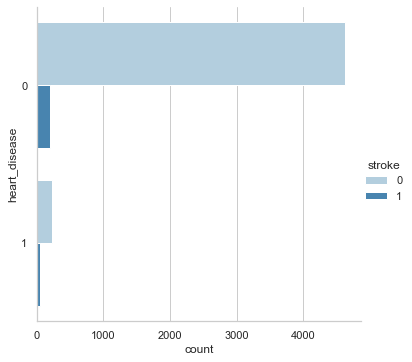

In [30]:
sns.catplot(y="heart_disease", hue="stroke", kind="count",
            palette="Blues",data=df)

<AxesSubplot:xlabel='stroke', ylabel='Count'>

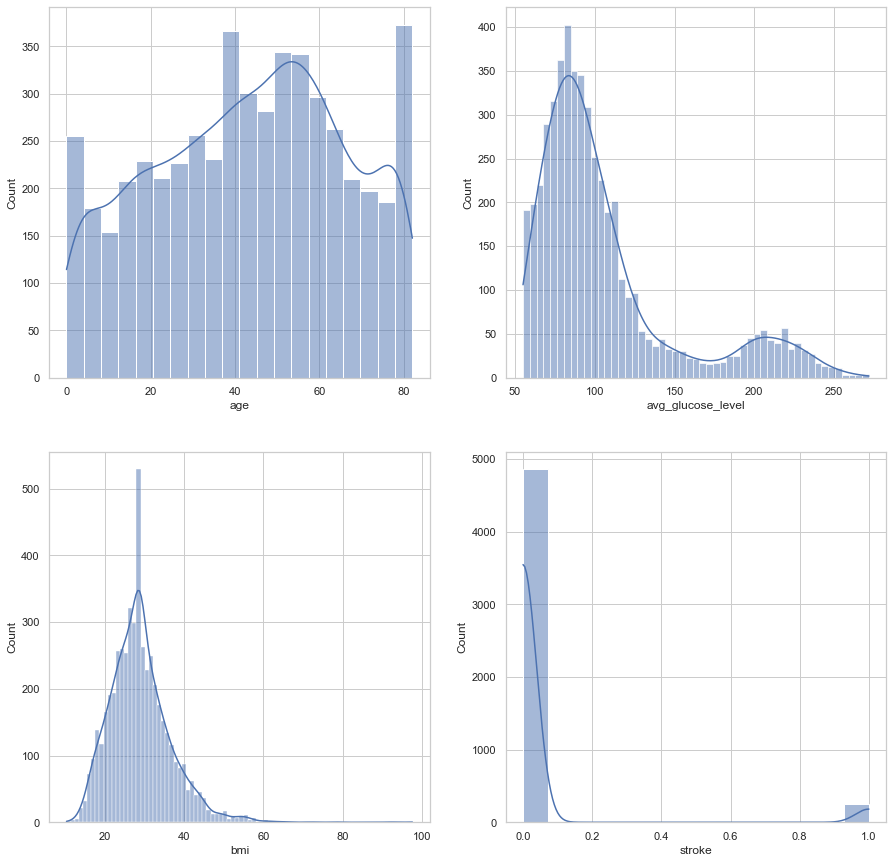

In [39]:
fig, ax = plt.subplots(2,2, figsize = (15,15))
#plt.suptitle("Count plots for categorical values")
sns.histplot(ax=ax[0,0], x='age',kde = True, data=df)
sns.histplot(ax=ax[0,1], x='avg_glucose_level',kde=True, data=df)
sns.histplot(ax=ax[1,0], x='bmi',kde = True, data=df)
sns.histplot(ax=ax[1,1], x='stroke',kde = True, data=df)


### dropping other from gender

In [15]:
df.drop(df[df['gender'] == 'Other'].index, inplace = True)
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

### checking for outliers

<AxesSubplot:xlabel='avg_glucose_level'>

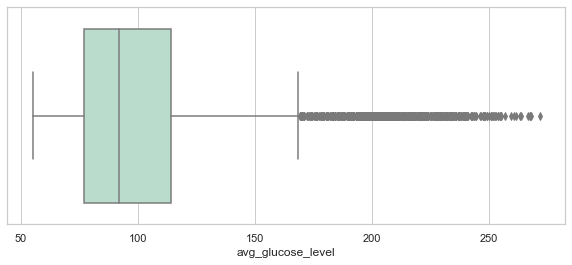

In [16]:
plt.figure(figsize = (10,4))
sns.set_theme(style='whitegrid')
sns.boxplot(x= df['avg_glucose_level'], palette='Pastel2')


<AxesSubplot:xlabel='bmi'>

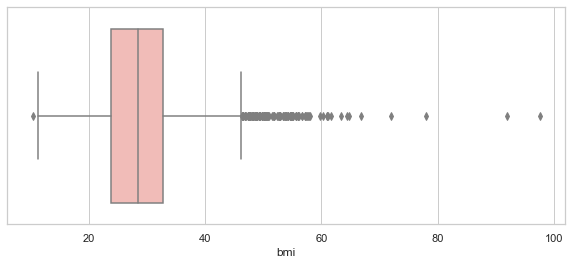

In [17]:
plt.figure(figsize = (10,4))
sns.set_theme(style='whitegrid')
sns.boxplot(x= df['bmi'], palette='Pastel1')

### encoding our categorical variables

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)
df_encoded.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3849,240,1,1
1,0,82,0,0,1,3,0,3587,162,2,1
2,1,101,0,1,1,2,0,2483,199,2,1
3,0,70,0,0,1,2,1,3384,218,3,1
4,0,100,1,0,1,3,0,3393,113,2,1


In [21]:
from sklearn.preprocessing import StandardScaler
features = ['gender','age','hypertension','heart_disease','ever_married', 'work_type', 'Residence_type', 'avg_glucose_level','bmi', 'smoking_status']
ft_to_scale = ['age', 'work_type', 'avg_glucose_level', 'bmi', 'smoking_status']
scaler = StandardScaler()
df_encoded[ft_to_scale] = scaler.fit_transform(df_encoded[ft_to_scale])

In [22]:
df_encoded.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,1.039322,0,1,1,-0.153852,1,1.780107,1.059906,-0.351819,1
1,0,0.779388,0,0,1,0.763335,0,1.542903,0.005806,0.581434,1
2,1,1.602513,0,1,1,-0.153852,0,0.543391,0.505828,0.581434,1
3,0,0.259519,0,0,1,-0.153852,1,1.359116,0.762595,1.514687,1
4,0,1.559191,1,0,1,0.763335,0,1.367264,-0.656385,0.581434,1


In [20]:
# df_encoded['gender'] = le.fit_transform(df_encoded['gender'])
# df_encoded['ever_married'] = le.fit_transform(df_encoded['ever_married'])
# df_encoded['work_type'] = le.fit_transform(df_encoded['work_type'])
# df_encoded['Residence_type'] = le.fit_transform(df_encoded['Residence_type'])
# df_encoded['smoking_status'] = le.fit_transform(df_encoded['smoking_status'])

In [21]:
df_encoded.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [34]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,1.051242,0,1,1,-0.153852,1,2.706450,1.001041,-0.351819,1
1,0,0.785889,0,0,1,0.763335,0,2.121652,-0.000165,0.581434,1
2,1,1.626174,0,1,1,-0.153852,0,-0.004867,0.468399,0.581434,1
3,0,0.255182,0,0,1,-0.153852,1,1.437473,0.715233,1.514687,1
4,0,1.581949,1,0,1,0.763335,0,1.501297,-0.635858,0.581434,1


### Correlation

<AxesSubplot:>

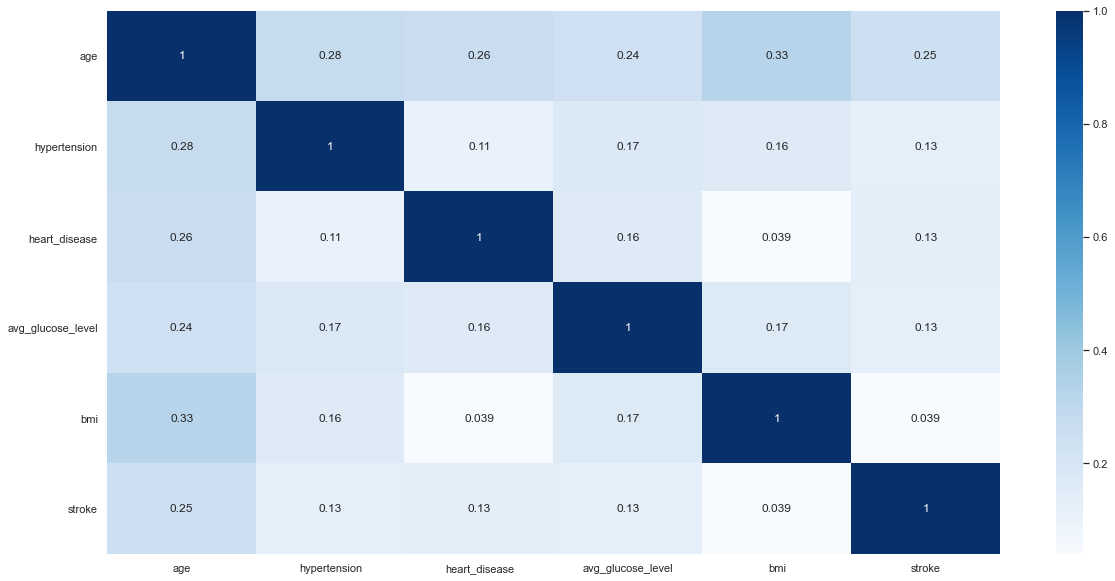

In [65]:
plt.figure(figsize = (20,10))
corr = df.corr()
sns.heatmap(corr, xticklabels=corr, yticklabels=corr.columns, annot=True, cmap= 'Blues')

In [44]:
df_encoded.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5.109000e+03,5109.000000,5.109000e+03,5.109000e+03,5.109000e+03,5109.000000
mean,0.413975,0.000000,0.097475,0.054022,0.656293,1.474213e-16,0.508123,-7.231987e-17,-1.752366e-16,-3.059687e-17,0.048738
std,0.492592,1.000098,0.296633,0.226084,0.474991,1.000098e+00,0.499983,1.000098e+00,1.000098e+00,1.000098e+00,0.215340
min,0.000000,-2.773049,0.000000,0.000000,0.000000,-1.988224e+00,0.000000,-1.704608e+00,-2.183477e+00,-1.285072e+00,0.000000
25%,0.000000,-0.780219,0.000000,0.000000,0.000000,-1.538518e-01,0.000000,-8.273182e-01,-6.834128e-01,-1.285072e+00,0.000000
50%,0.000000,0.086229,0.000000,0.000000,1.000000,-1.538518e-01,1.000000,-6.500859e-02,-6.176436e-02,5.814336e-01,0.000000
75%,1.000000,0.779388,0.000000,0.000000,1.000000,7.633346e-01,1.000000,8.177134e-01,5.463699e-01,5.814336e-01,0.000000
max,1.000000,1.689158,1.000000,1.000000,1.000000,1.680521e+00,1.000000,1.895992e+00,3.465415e+00,1.514687e+00,1.000000


### Splitting and resampling the data

In [47]:
from sklearn.model_selection import train_test_split

In [45]:
X = df_encoded.drop('stroke', axis = 1)
y = df_encoded['stroke']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Reason for resampling

- the number of people not having a stroke is much larger than the number of people having a stroke
- if we dont resample the dataour model will predict that all cases do not have stroke
- to overcome this we either undersample or oversample

In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
sm = SMOTE(random_state = 2)
X_train_res,y_train_res = sm.fit_resample(X_train,y_train)

In [72]:
y_train.value_counts()

0    3403
1     173
Name: stroke, dtype: int64

In [71]:
y_train_res.value_counts()

1    3403
0    3403
Name: stroke, dtype: int64

## Implementing various algorithms

In [54]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Train score: 1.0
Accuracy score: 0.9060665362035225
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1457
           1       0.14      0.17      0.15        76

    accuracy                           0.91      1533
   macro avg       0.55      0.56      0.55      1533
weighted avg       0.92      0.91      0.91      1533



<AxesSubplot:>

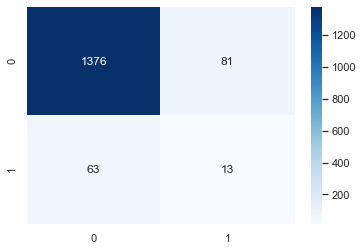

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_res,y_train_res)
rfc_pred = rfc.predict(X_test)
print("Train score: {}" .format(rfc.score(X_train_res,y_train_res)))
print("Accuracy score: {}" .format(accuracy_score(y_test,rfc_pred)))
print(classification_report(y_test, rfc_pred))
sns.heatmap(confusion_matrix(y_test,rfc_pred), annot = True, cmap='Blues',fmt = 'd')

Train score: 0.7931237143696738
Accuracy score: 0.7606001304631441
              precision    recall  f1-score   support

           0       0.98      0.76      0.86      1457
           1       0.14      0.72      0.23        76

    accuracy                           0.76      1533
   macro avg       0.56      0.74      0.54      1533
weighted avg       0.94      0.76      0.83      1533



<AxesSubplot:>

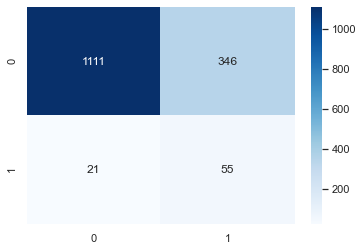

In [56]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_res,y_train_res)
lr_pred = lr.predict(X_test)
print("Train score: {}" .format(lr.score(X_train_res,y_train_res)))
print("Accuracy score: {}" .format(accuracy_score(y_test,lr_pred)))
print(classification_report(y_test, lr_pred))
sns.heatmap(confusion_matrix(y_test,lr_pred), annot = True, cmap='Blues',fmt = 'd')

Train score: 0.9246253305906553
Accuracy score: 0.7945205479452054
              precision    recall  f1-score   support

           0       0.96      0.82      0.88      1457
           1       0.09      0.37      0.15        76

    accuracy                           0.79      1533
   macro avg       0.53      0.59      0.52      1533
weighted avg       0.92      0.79      0.85      1533



<AxesSubplot:>

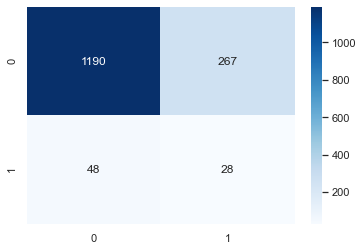

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_res,y_train_res)
knn_pred = knn.predict(X_test)
print("Train score: {}" .format(knn.score(X_train_res,y_train_res)))
print("Accuracy score: {}" .format(accuracy_score(y_test,knn_pred)))
print(classification_report(y_test, knn_pred))
sns.heatmap(confusion_matrix(y_test,knn_pred), annot = True, cmap='Blues',fmt = 'd')

Train score: 0.7581545694975022
Accuracy score: 0.7025440313111546
              precision    recall  f1-score   support

           0       0.98      0.70      0.82      1457
           1       0.12      0.75      0.20        76

    accuracy                           0.70      1533
   macro avg       0.55      0.73      0.51      1533
weighted avg       0.94      0.70      0.79      1533



<AxesSubplot:>

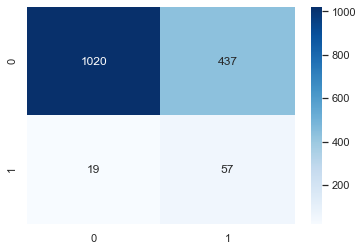

In [58]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_res,y_train_res)
gnb_pred = gnb.predict(X_test)
print("Train score: {}" .format(gnb.score(X_train_res,y_train_res)))
print("Accuracy score: {}" .format(accuracy_score(y_test,gnb_pred)))
print(classification_report(y_test, gnb_pred))
sns.heatmap(confusion_matrix(y_test,gnb_pred), annot = True, cmap='Blues',fmt = 'd')

Train score: 0.8704084631207758
Accuracy score: 0.776255707762557
              precision    recall  f1-score   support

           0       0.97      0.79      0.87      1457
           1       0.13      0.61      0.21        76

    accuracy                           0.78      1533
   macro avg       0.55      0.70      0.54      1533
weighted avg       0.93      0.78      0.84      1533



<AxesSubplot:>

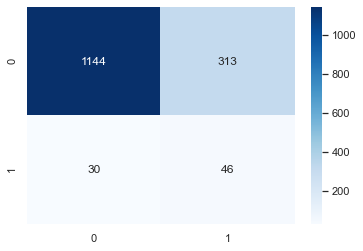

In [59]:
from sklearn.svm import SVC
svc = SVC()

svc.fit(X_train_res,y_train_res)
svc_pred = svc.predict(X_test)
print("Train score: {}" .format(svc.score(X_train_res,y_train_res)))
print("Accuracy score: {}" .format(accuracy_score(y_test,svc_pred)))
print(classification_report(y_test, svc_pred))
sns.heatmap(confusion_matrix(y_test,svc_pred), annot = True, cmap='Blues',fmt = 'd')

Train score: 1.0
Accuracy score: 0.8845401174168297
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1457
           1       0.13      0.24      0.17        76

    accuracy                           0.88      1533
   macro avg       0.54      0.58      0.55      1533
weighted avg       0.92      0.88      0.90      1533



<AxesSubplot:>

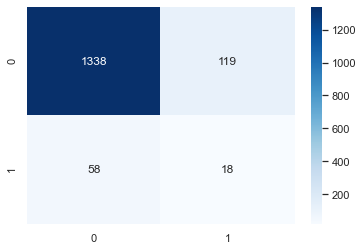

In [60]:
from sklearn.tree import DecisionTreeClassifier
      
dtc = DecisionTreeClassifier()

dtc.fit(X_train_res,y_train_res)
dtc_pred = dtc.predict(X_test)
print("Train score: {}" .format(dtc.score(X_train_res,y_train_res)))
print("Accuracy score: {}" .format(accuracy_score(y_test,dtc_pred)))
print(classification_report(y_test, dtc_pred))
sns.heatmap(confusion_matrix(y_test,dtc_pred), annot = True, cmap='Blues',fmt = 'd')

In [62]:
from matplotlib import pyplot as plt
from sklearn import metrics

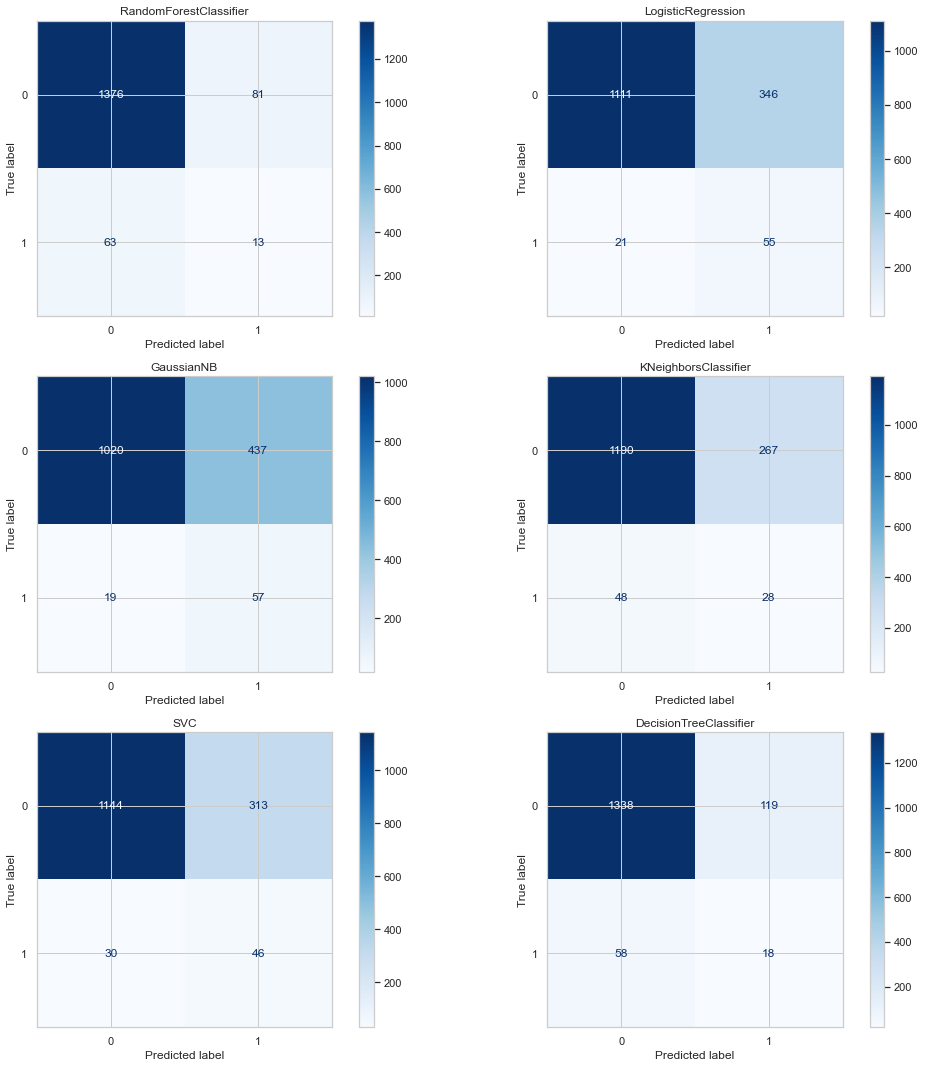

In [64]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15,15))

clf = [rfc,lr,gnb,knn,svc,dtc]

for cls,ax in zip(clf,axes.flatten()):
    metrics.plot_confusion_matrix(cls, X_test, y_test, ax=ax, cmap = 'Blues')
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()
plt.show()